Problem defination:Attrition in human resources refers to the gradual loss of employees overtime. In general, relatively high attrition is problematic for companies.The purpose of this model is to predict the attrition

First Import all necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

loading data set

In [2]:
df=pd.read_csv("HR-Employee-Attrition.csv")

In [3]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [5]:
df.shape

(1470, 35)

we have 1470 rows and 35 columns

# Checking data types

In [6]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

we have data with int  and object type

# Checking missing value

In [7]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

data set have no missing values

<AxesSubplot:>

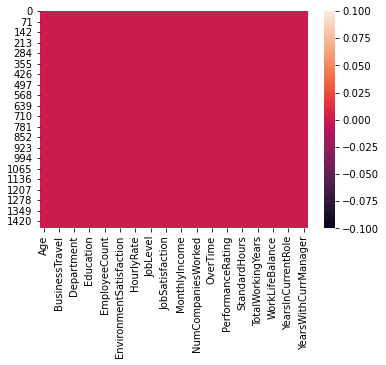

In [8]:
sns.heatmap(df.isnull())

heatmap shows that there is no missing values

# Stastical summary

In [9]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


# Checking correlation

In [10]:
df.corr()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.208034,NaN,-0.010145,0.010146,0.024287,0.029820,0.509604,...,0.053535,NaN,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,-0.016806,NaN,-0.050990,0.018355,0.023381,0.046135,0.002966,...,0.007846,NaN,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,NaN,0.032916,-0.016075,0.031131,0.008783,0.005303,...,0.006557,NaN,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.016806,0.021042,1.000000,NaN,0.042070,-0.027128,0.016775,0.042438,0.101589,...,-0.009118,NaN,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.010145,-0.050990,0.032916,0.042070,NaN,1.000000,0.017621,0.035179,-0.006888,-0.018519,...,-0.069861,NaN,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,NaN,0.017621,1.000000,-0.049857,-0.008278,0.001212,...,0.007665,NaN,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,0.023381,0.031131,0.016775,NaN,0.035179,-0.049857,1.000000,0.042861,-0.027853,...,0.001330,NaN,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,0.046135,0.008783,0.042438,NaN,-0.006888,-0.008278,0.042861,1.000000,-0.012630,...,0.034297,NaN,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,0.002966,0.005303,0.101589,NaN,-0.018519,0.001212,-0.027853,-0.012630,1.000000,...,0.021642,NaN,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281


<AxesSubplot:>

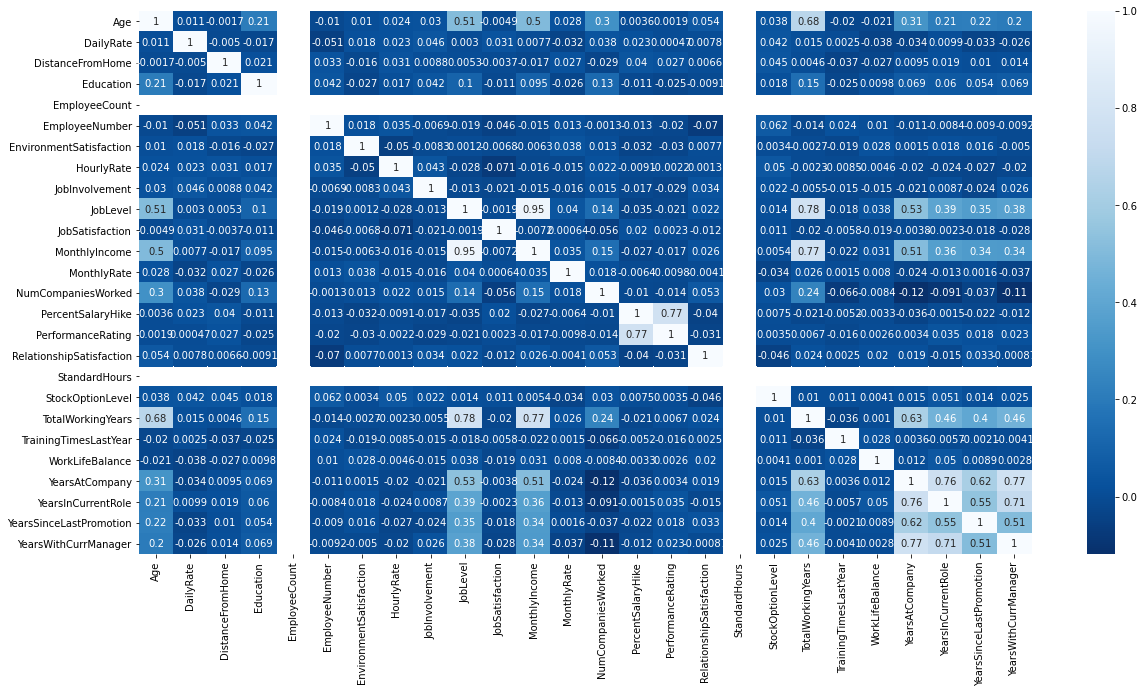

In [11]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True,cmap='Blues_r')


above heatmap shows the correlation between different variables

In [12]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

# Visulazation

No     1233
Yes     237
Name: Attrition, dtype: int64


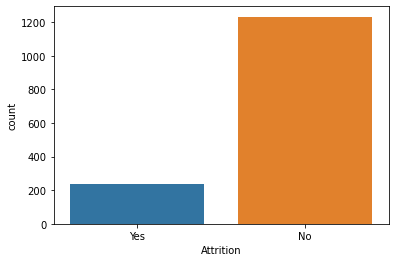

In [13]:
sns.countplot(df['Attrition'])
print(df['Attrition'].value_counts())

above countplot of target variable shows that there is class imbalance problem,so we have to solve this problem

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64


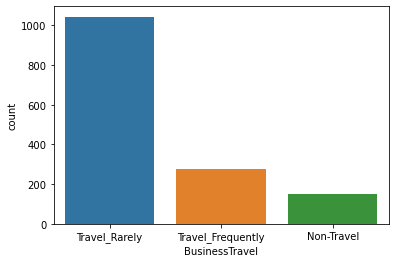

In [14]:
sns.countplot(df['BusinessTravel'])
print(df['BusinessTravel'].value_counts())

above countplot of BusinessTravel shows the values frequency of travelling 

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64


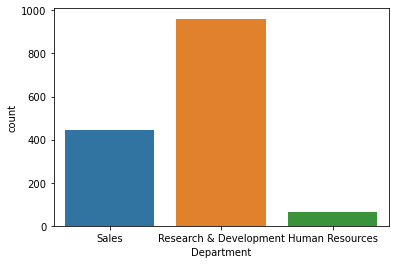

In [16]:
sns.countplot(df['Department'])
print(df['Department'].value_counts())

above countplot of department shows the values of different departments

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64


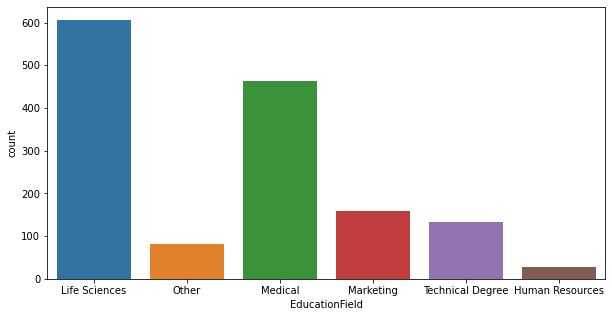

In [19]:
plt.figure(figsize=(10,5))
sns.countplot(df['EducationField'])
print(df['EducationField'].value_counts())

above countplot of education field shows the values of education fields

Male      882
Female    588
Name: Gender, dtype: int64


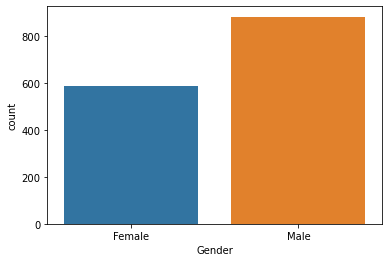

In [23]:

sns.countplot(df['Gender'])
print(df['Gender'].value_counts())

above countplot of Gender shows the how many male and female employess in company

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64


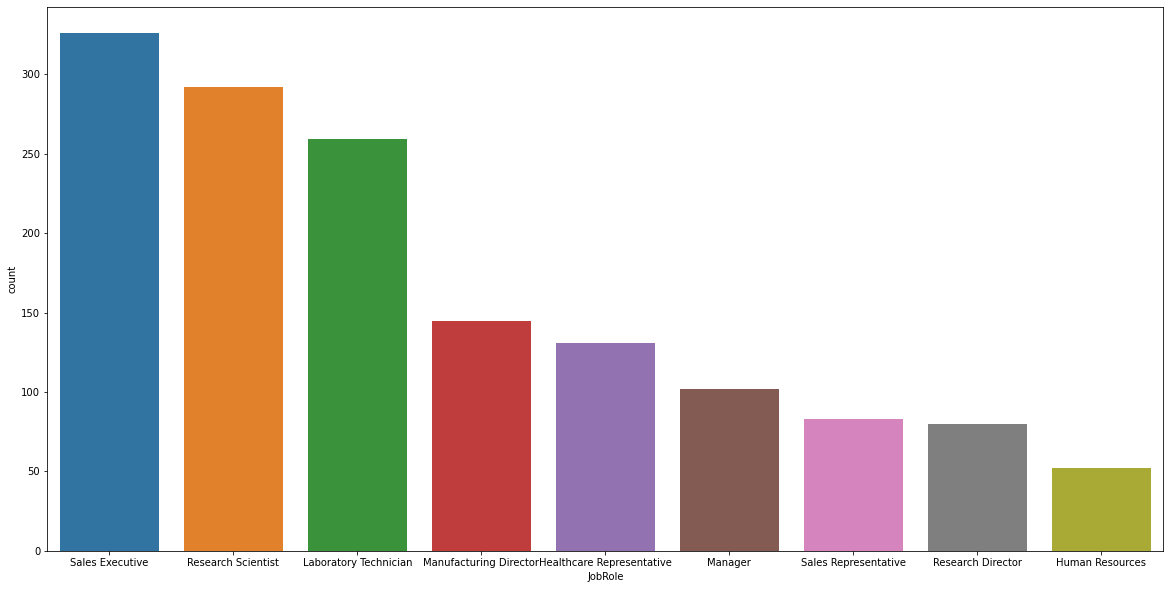

In [26]:
plt.figure(figsize=(20,10))
sns.countplot(df['JobRole'])
print(df['JobRole'].value_counts())

above countplot of jobrole shows the different jobroles values 

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64


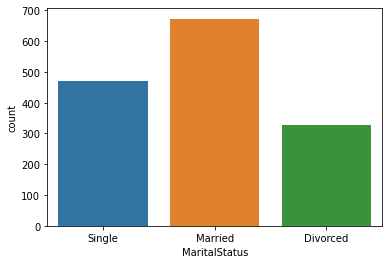

In [28]:
sns.countplot(df['MaritalStatus'])
print(df['MaritalStatus'].value_counts())

above countplot of marital status shows the how many employess are married ,unmarried and divorced

Y    1470
Name: Over18, dtype: int64


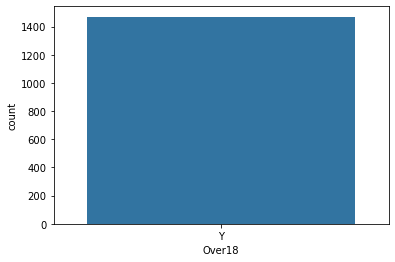

In [30]:
sns.countplot(df['Over18'])
print(df['Over18'].value_counts())

No     1054
Yes     416
Name: OverTime, dtype: int64


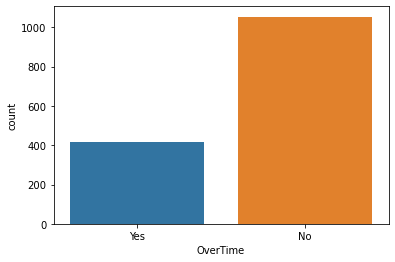

In [32]:
sns.countplot(df['OverTime'])
print(df['OverTime'].value_counts())

above count plot shows the categores of overtime   ==yes and no

In [39]:
cols=['Age', 'DailyRate','DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction',  'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction',
        'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
        'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager']

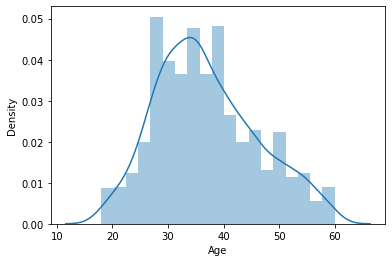

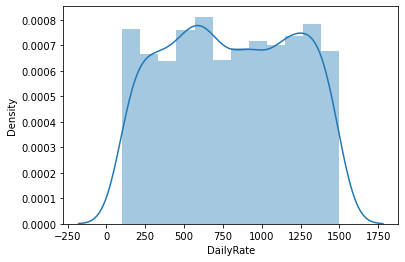

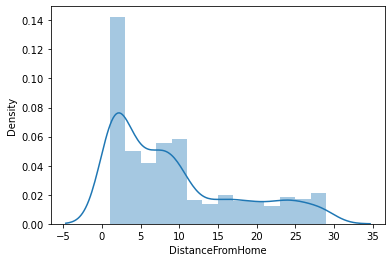

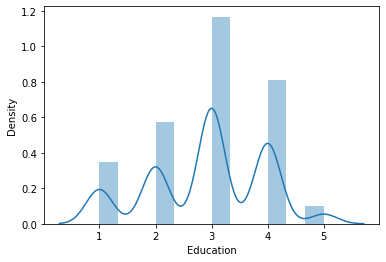

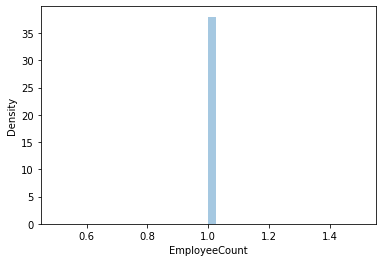

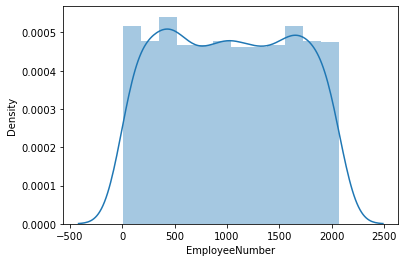

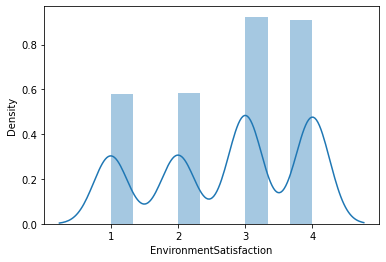

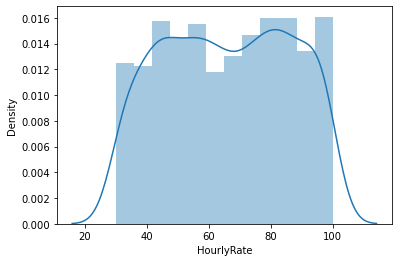

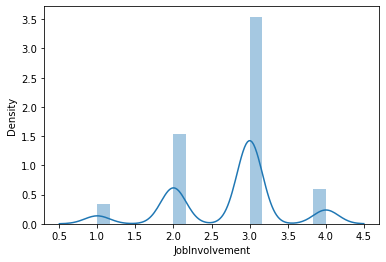

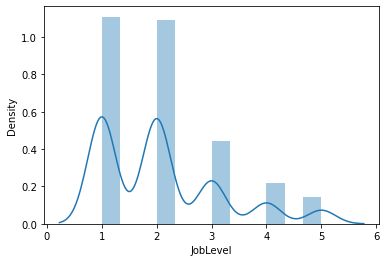

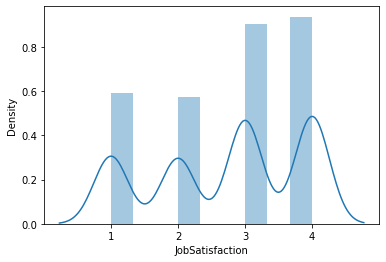

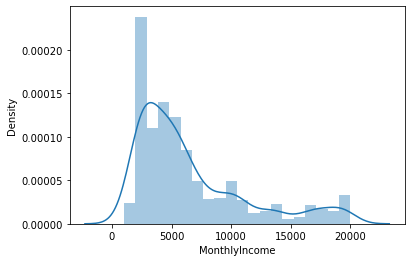

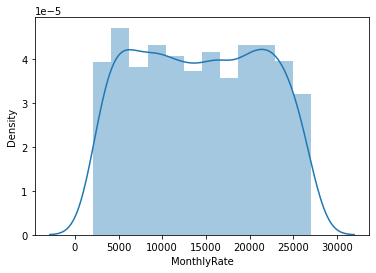

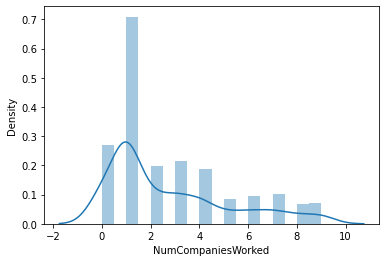

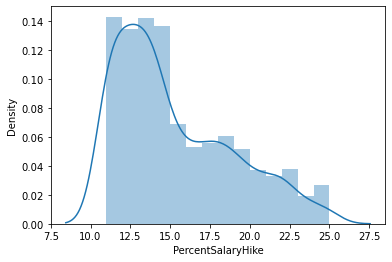

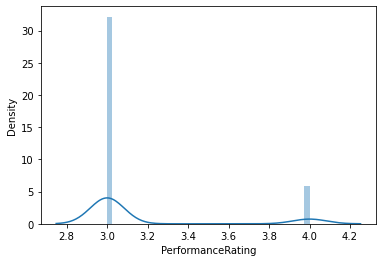

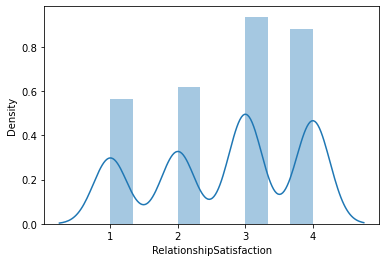

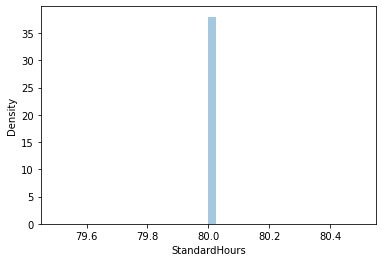

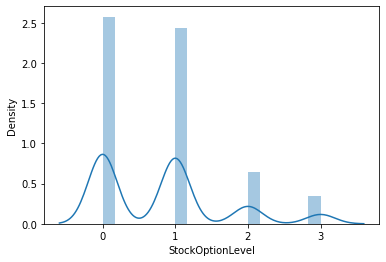

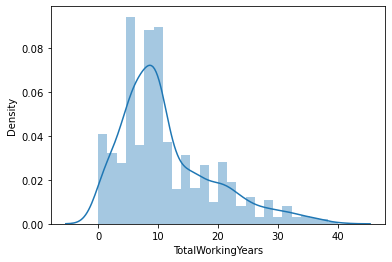

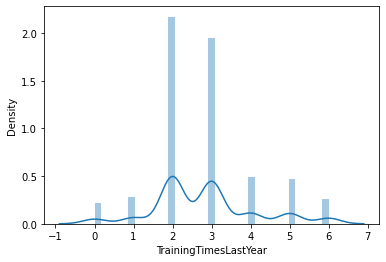

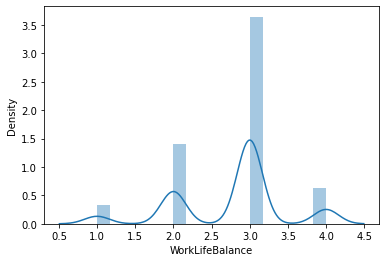

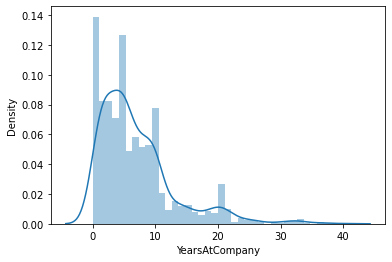

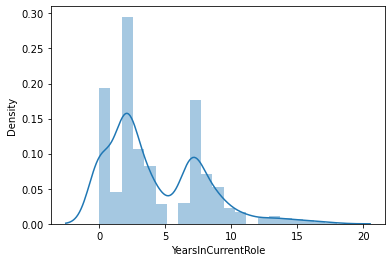

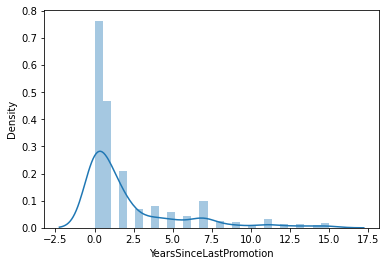

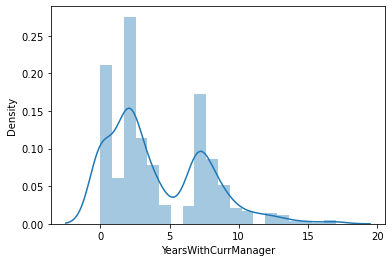

<Figure size 432x288 with 0 Axes>

In [40]:
for i in df[cols]:
    sns.distplot(df[i])
    plt.figure()

above distplot show that some columns such as 'DistanceFrom HOme ' ,'Monthly income','percentsalaryhike','total working years',,'yearsat compnay','years since promotion'
have a left skewness data

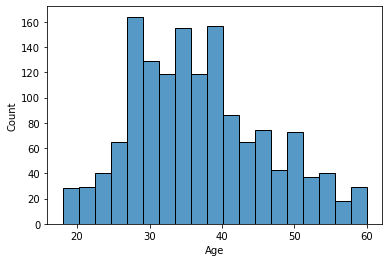

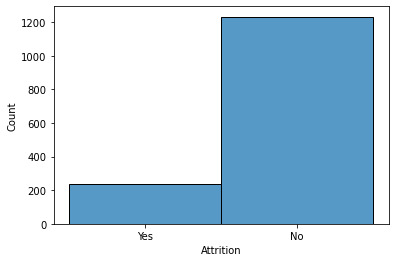

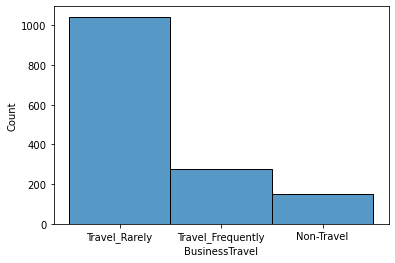

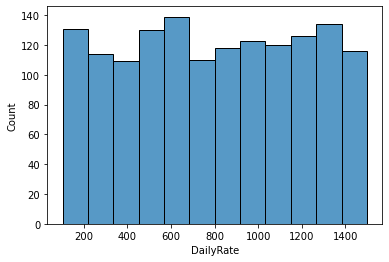

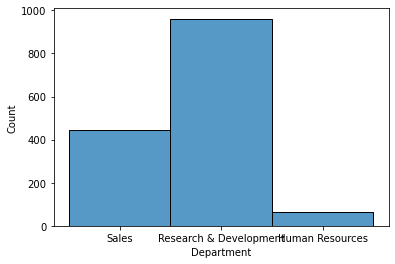

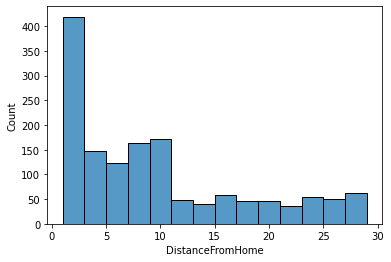

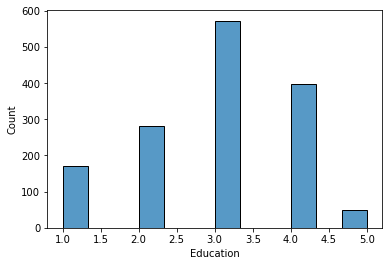

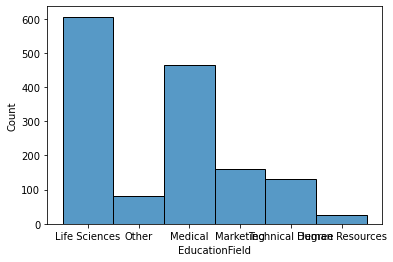

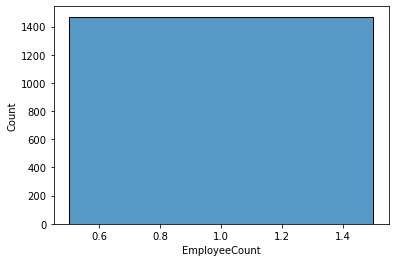

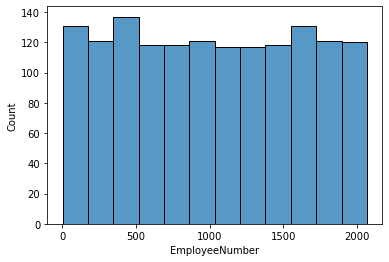

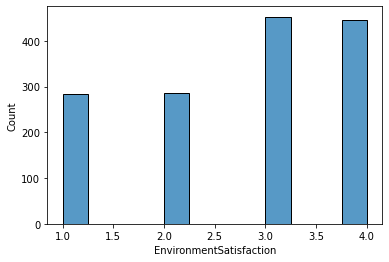

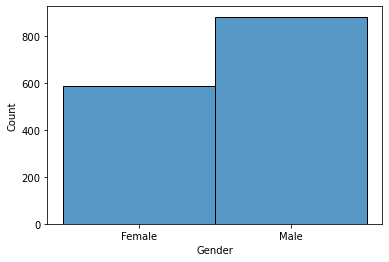

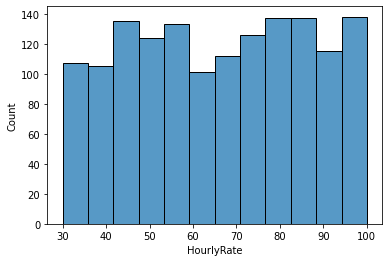

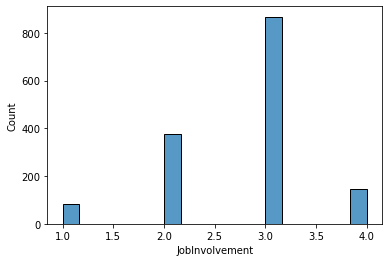

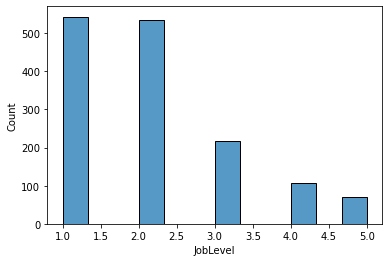

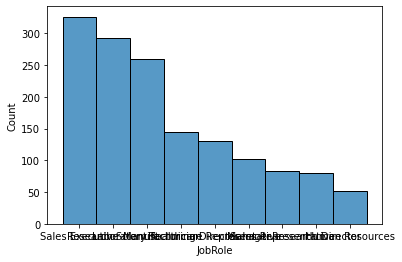

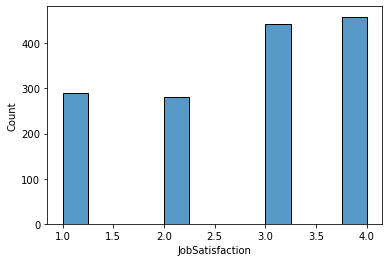

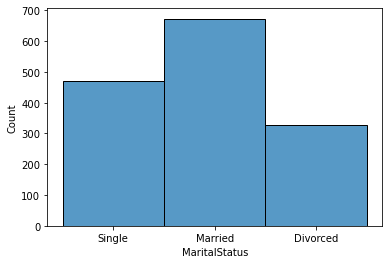

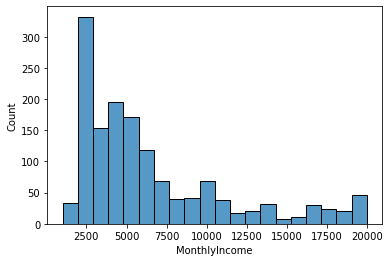

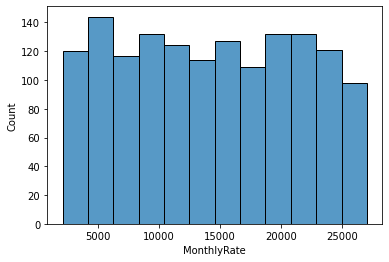

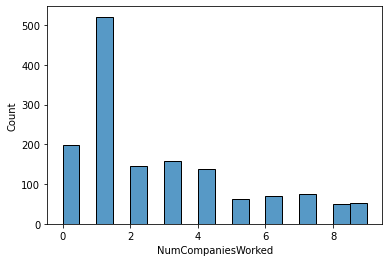

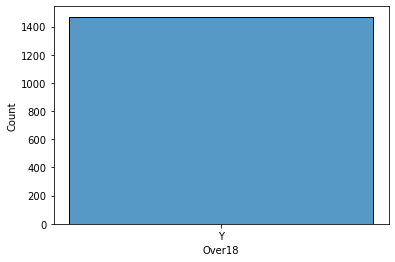

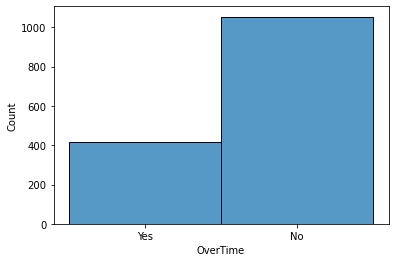

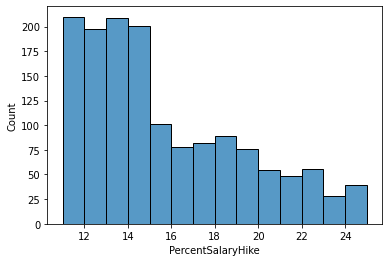

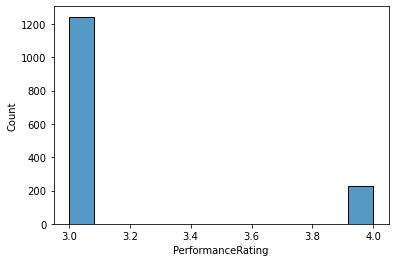

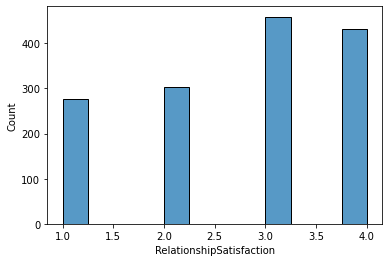

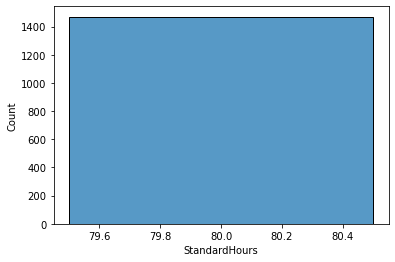

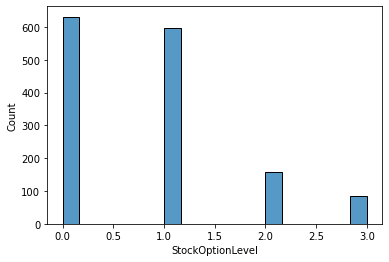

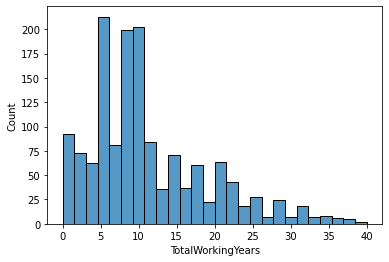

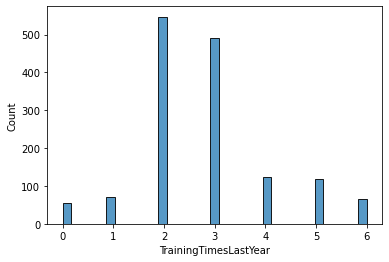

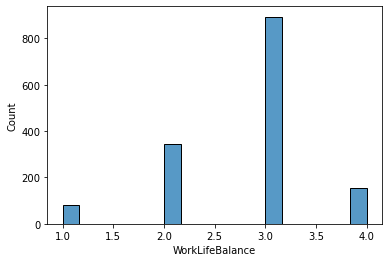

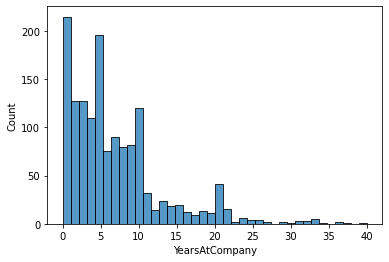

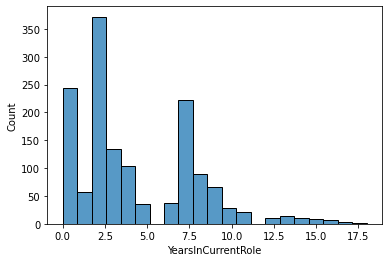

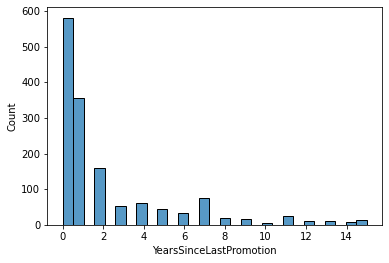

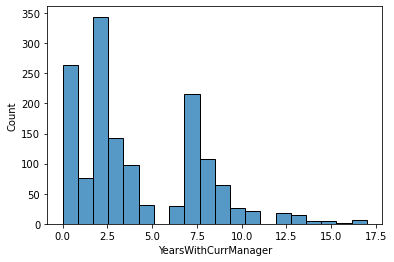

<Figure size 432x288 with 0 Axes>

In [41]:
for i in df.columns:
    sns.histplot(df[i])
    plt.figure()

above histplot shows the frequncyes of data

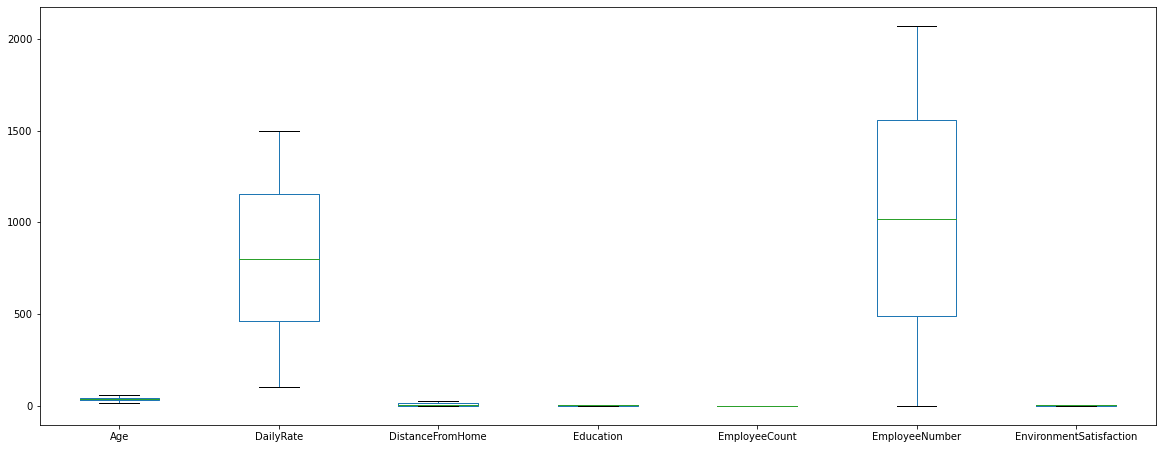

In [56]:
df.iloc[:,0:12].plot(kind='box',figsize=(20,10))
plt.subplots_adjust(bottom=0.30)
plt.show()

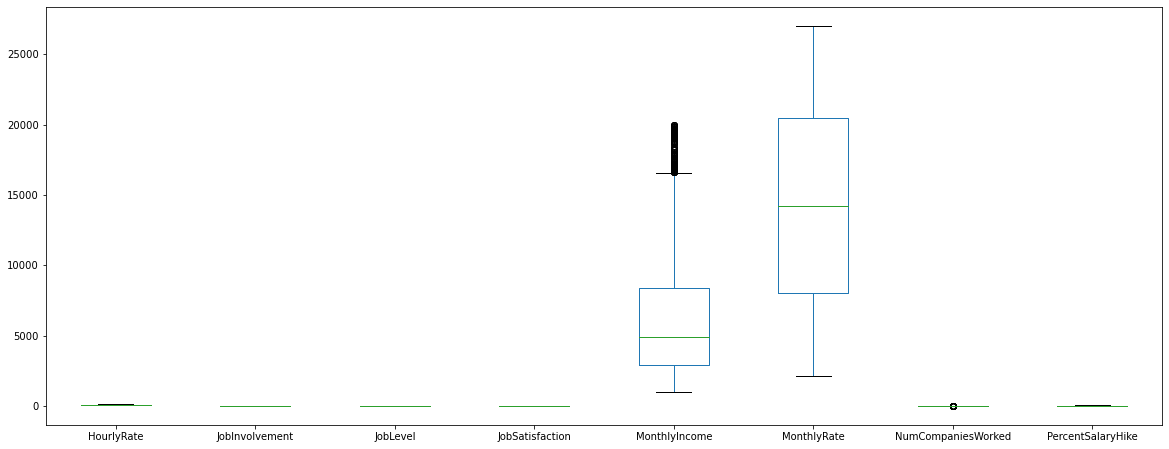

In [57]:
df.iloc[:,12:24].plot(kind='box',figsize=(20,10))
plt.subplots_adjust(bottom=0.30)
plt.show()

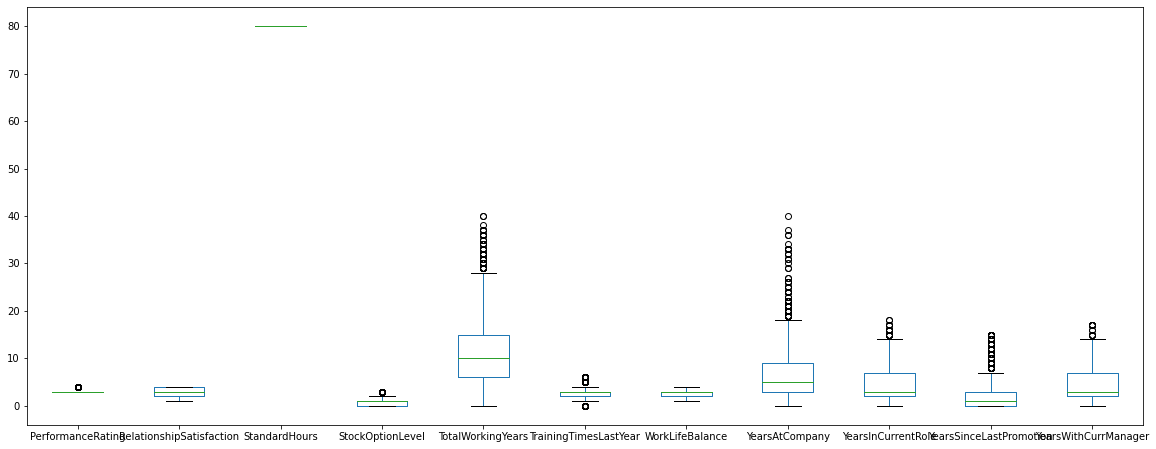

In [58]:
df.iloc[:,24:].plot(kind='box',figsize=(20,10))
plt.subplots_adjust(bottom=0.30)
plt.show()

above box plot shows that there are some outlirers present in some columns 

In [59]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [60]:
df.skew()

Age                         0.413286
DailyRate                  -0.003519
DistanceFromHome            0.958118
Education                  -0.289681
EmployeeCount               0.000000
EmployeeNumber              0.016574
EnvironmentSatisfaction    -0.321654
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobSatisfaction            -0.329672
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StandardHours               0.000000
StockOptionLevel            0.968980
TotalWorkingYears           1.117172
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
YearsAtCompany              1.764529
YearsInCurrentRole          0.917363
YearsSinceLastPromotion     1.984290
YearsWithCurrManager        0.833451
dtype: float64

there are skewness present in different columns of data set

# Encoding

In [61]:
from sklearn.preprocessing import LabelEncoder

In [63]:
le=LabelEncoder()

In [64]:
df['Attrition']=le.fit_transform(df['Attrition'])

In [65]:
df['BusinessTravel']=le.fit_transform(df['BusinessTravel'])

In [66]:
df['Department']=le.fit_transform(df['Department'])

In [67]:
df['EducationField']=le.fit_transform(df['EducationField'])

In [68]:
df['Gender']=le.fit_transform(df['Gender'])

In [69]:
df['JobRole']=le.fit_transform(df['JobRole'])

In [70]:
df['MaritalStatus']=le.fit_transform(df['MaritalStatus'])

In [71]:
df['Over18']=le.fit_transform(df['Over18'])

In [72]:
df['OverTime']=le.fit_transform(df['OverTime'])

In [73]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,7,...,4,80,1,6,3,3,2,2,2,2


Encoded categorical data into numerical data using Label encoder

In [74]:
df.corr()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.159205,0.024751,0.010661,-0.031882,-0.001686,0.208034,-0.040873,NaN,-0.010145,...,0.053535,NaN,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
Attrition,-0.159205,1.000000,0.000074,-0.056652,0.063991,0.077924,-0.031373,0.026846,NaN,-0.010577,...,-0.045872,NaN,-0.137145,-0.171063,-0.059478,-0.063939,-0.134392,-0.160545,-0.033019,-0.156199
BusinessTravel,0.024751,0.000074,1.000000,-0.004086,-0.009044,-0.024469,0.000757,0.023724,NaN,-0.015578,...,-0.035986,NaN,-0.016727,0.034226,0.015240,-0.011256,-0.014575,-0.011497,-0.032591,-0.022636
DailyRate,0.010661,-0.056652,-0.004086,1.000000,0.007109,-0.004985,-0.016806,0.037709,NaN,-0.050990,...,0.007846,NaN,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
Department,-0.031882,0.063991,-0.009044,0.007109,1.000000,0.017225,0.007996,0.013720,NaN,-0.010895,...,-0.022414,NaN,-0.012193,-0.015762,0.036875,0.026383,0.022920,0.056315,0.040061,0.034282
DistanceFromHome,-0.001686,0.077924,-0.024469,-0.004985,0.017225,1.000000,0.021042,0.002013,NaN,0.032916,...,0.006557,NaN,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.031373,0.000757,-0.016806,0.007996,0.021042,1.000000,-0.039592,NaN,0.042070,...,-0.009118,NaN,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EducationField,-0.040873,0.026846,0.023724,0.037709,0.013720,0.002013,-0.039592,1.000000,NaN,-0.002516,...,-0.004378,NaN,-0.016185,-0.027848,0.049195,0.041191,-0.018692,-0.010506,0.002326,-0.004130
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.010145,-0.010577,-0.015578,-0.050990,-0.010895,0.032916,0.042070,-0.002516,NaN,1.000000,...,-0.069861,NaN,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197


<AxesSubplot:>

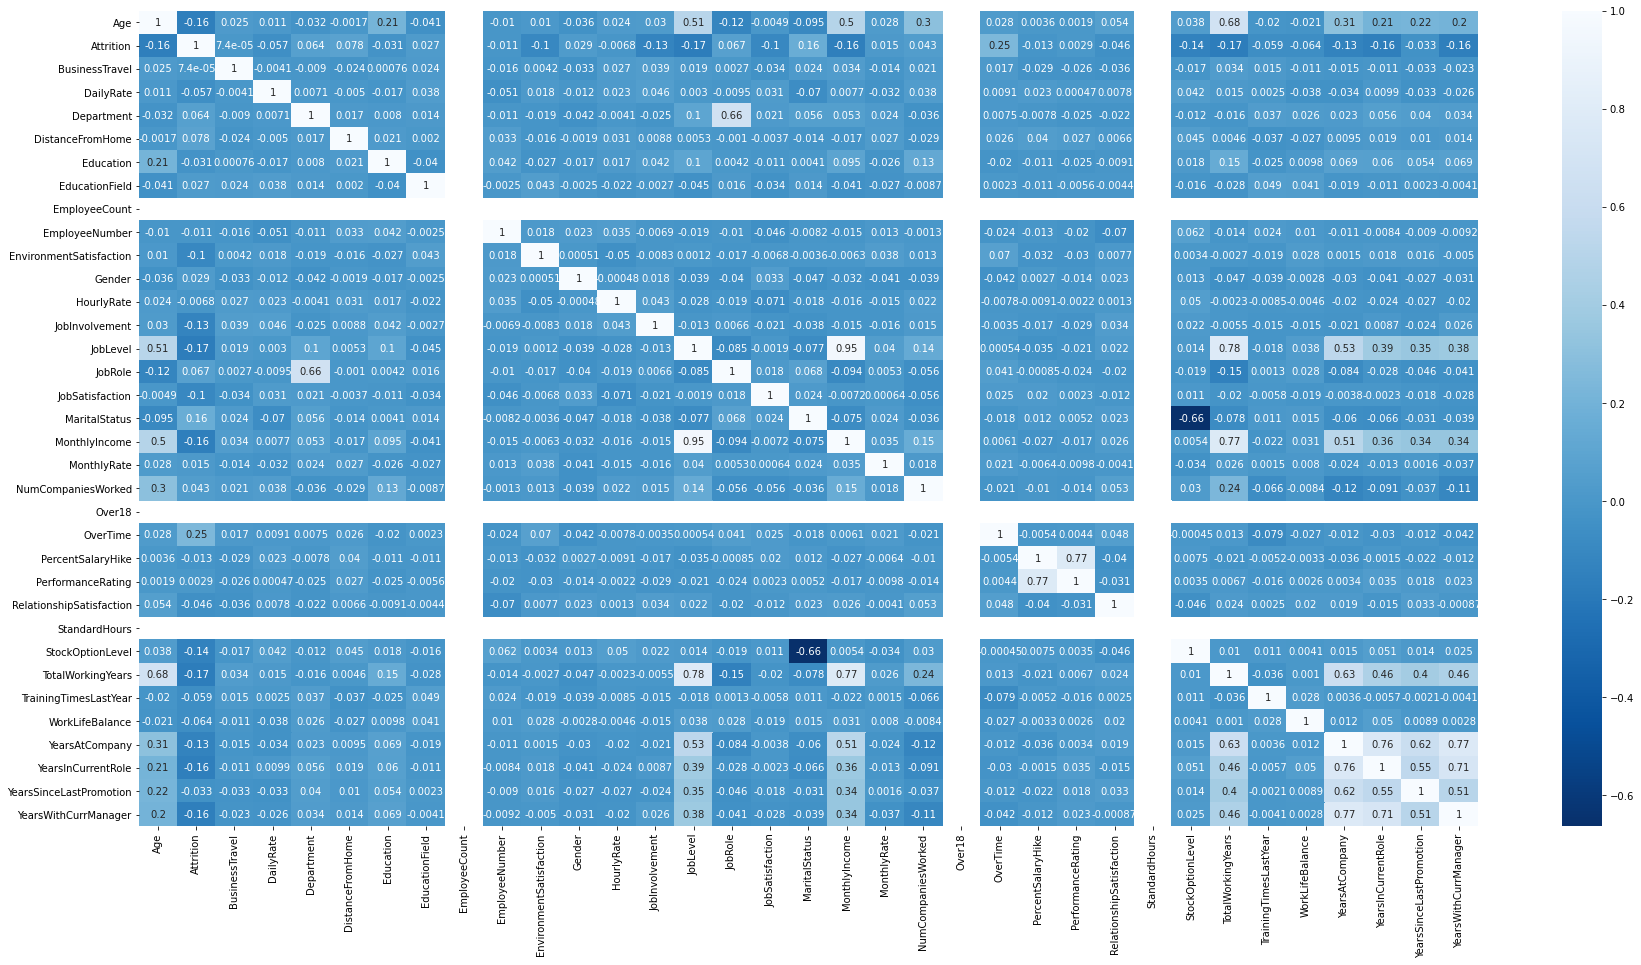

In [82]:
plt.figure(figsize=(30,15))
sns.heatmap(df.corr(),annot=True,cmap='Blues_r')


Checking correlation between target variable and input varibales

In [197]:
df2=df.drop(['Over18','StandardHours','EmployeeCount'],axis=1)

dropped unnecessary columns

In [198]:
df2.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,2,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,2,3,...,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,4,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,5,4,...,3,3,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,7,1,...,3,4,1,6,3,3,2,2,2,2


In [199]:
cols1=['YearsWithCurrManager','YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'StockOptionLevel',            
'TotalWorkingYears','OverTime' , 'PercentSalaryHike', 'PerformanceRating','NumCompaniesWorked'  ,'MonthlyIncome','JobLevel','DistanceFromHome'
]

In [200]:
df2.skew()

Age                         0.413286
Attrition                   1.844366
BusinessTravel             -1.439006
DailyRate                  -0.003519
Department                  0.172231
DistanceFromHome            0.958118
Education                  -0.289681
EducationField              0.550371
EmployeeNumber              0.016574
EnvironmentSatisfaction    -0.321654
Gender                     -0.408665
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobRole                    -0.357270
JobSatisfaction            -0.329672
MaritalStatus              -0.152175
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
OverTime                    0.964489
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StockOptionLevel            0.968980
TotalWorkingYears           1.117172
TrainingTimesLastYear       0.553124
W

In [201]:
for i in df2[cols1]:
    df2[i]=np.log(1+df2[i])

In [202]:
df2.skew()

Age                         0.413286
Attrition                   1.844366
BusinessTravel             -1.439006
DailyRate                  -0.003519
Department                  0.172231
DistanceFromHome           -0.029121
Education                  -0.289681
EducationField              0.550371
EmployeeNumber              0.016574
EnvironmentSatisfaction    -0.321654
Gender                     -0.408665
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    0.448133
JobRole                    -0.357270
JobSatisfaction            -0.329672
MaritalStatus              -0.152175
MonthlyIncome               0.286448
MonthlyRate                 0.018578
NumCompaniesWorked          0.092896
OverTime                    0.964489
PercentSalaryHike           0.513543
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StockOptionLevel            0.271963
TotalWorkingYears          -0.622175
TrainingTimesLastYear       0.553124
W

removing skewness using np.log function

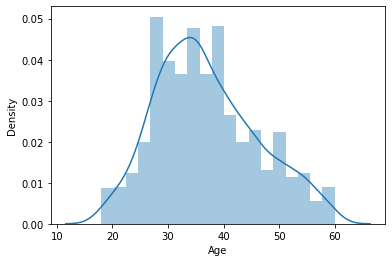

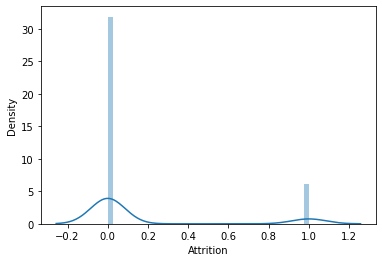

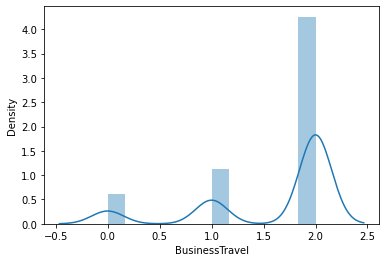

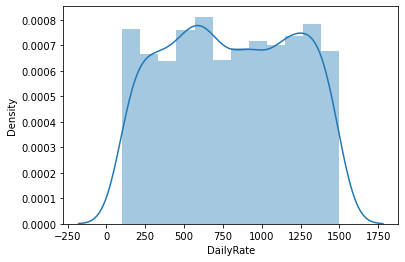

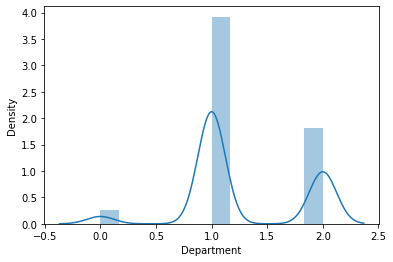

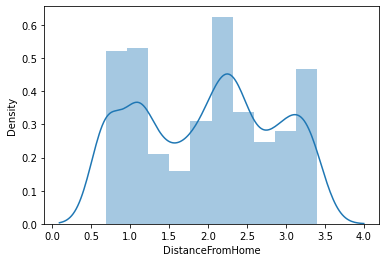

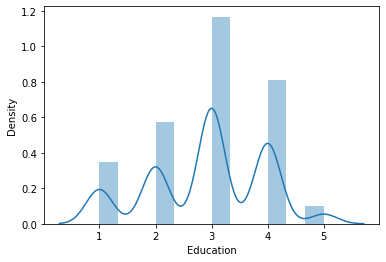

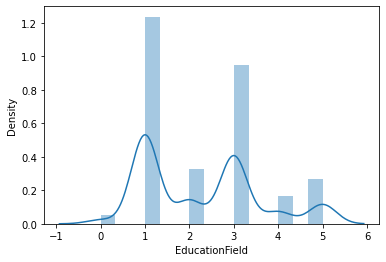

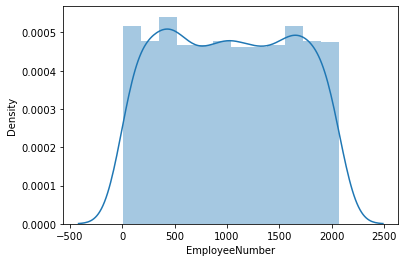

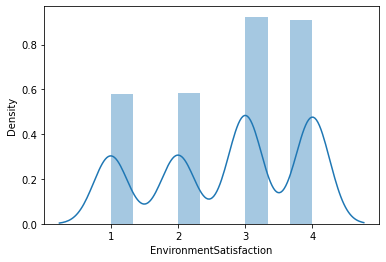

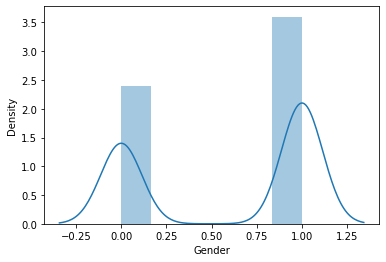

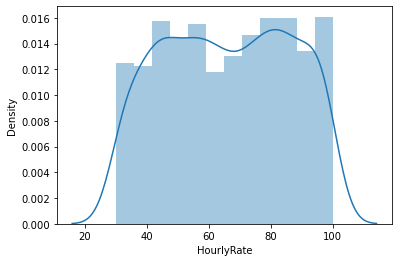

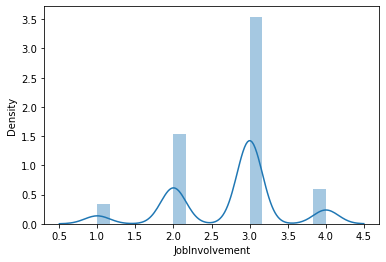

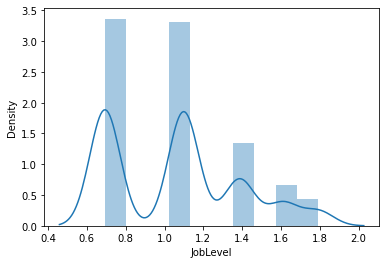

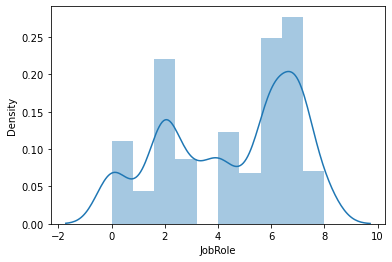

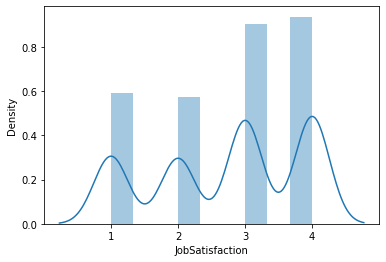

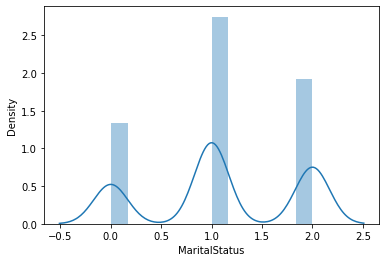

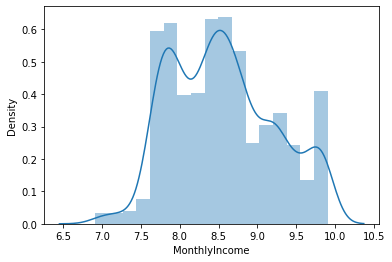

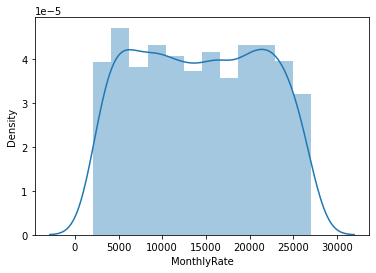

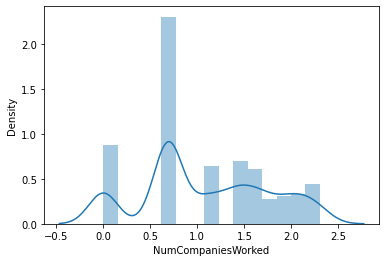

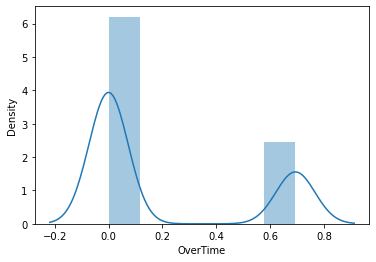

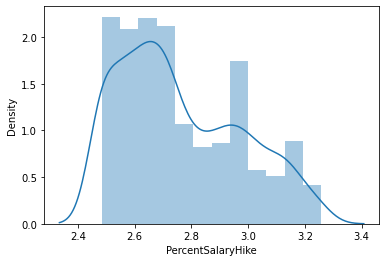

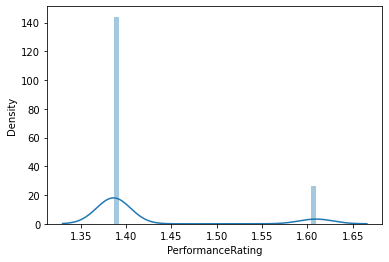

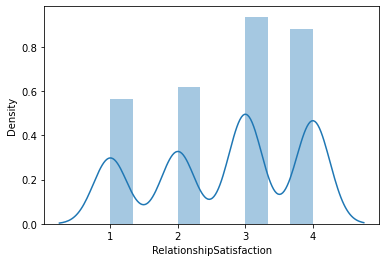

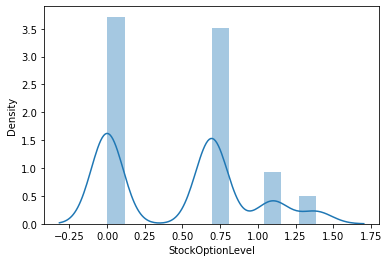

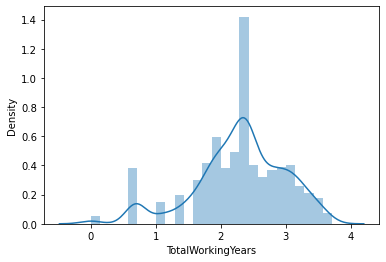

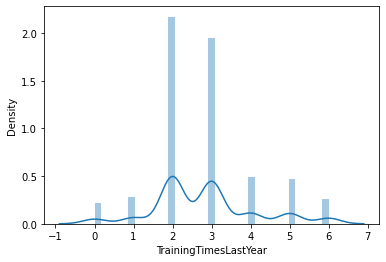

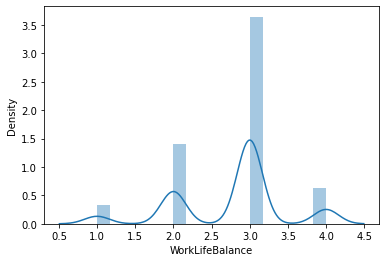

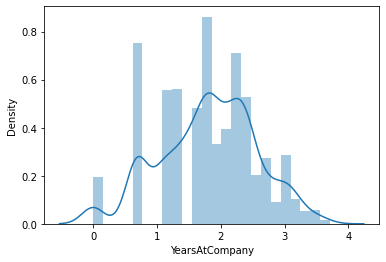

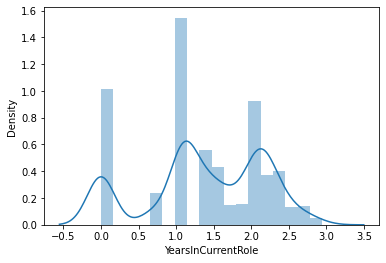

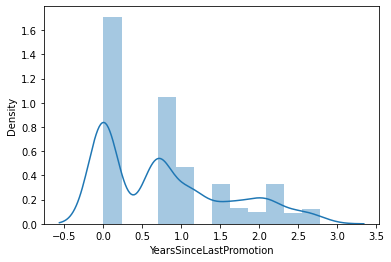

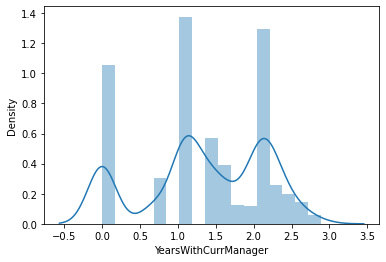

<Figure size 432x288 with 0 Axes>

In [203]:
for i in df2.columns:
    sns.distplot(df2[i])
    plt.figure()

after removing skewness,above distplot show data is normally distributed now

In [92]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

importing classification algotithmns

In [94]:
lg=LogisticRegression()
dtc=DecisionTreeClassifier()
sv=SVC()
gnb=GaussianNB()
rf=RandomForestClassifier()
ad=AdaBoostClassifier()


In [95]:
list1=[lg,sv,gnb,dtc,rf,ad]

In [204]:
x=df2.drop('Attrition',axis=1)

In [205]:
y=df2['Attrition']

In [206]:
x.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,2,1102,2,0.693147,2,1,1,2,0,...,1.386294,1,0.000000,2.197225,0,1,1.945910,1.609438,0.000000,1.791759
1,49,1,279,1,2.197225,1,1,2,3,1,...,1.609438,4,0.693147,2.397895,3,3,2.397895,2.079442,0.693147,2.079442
2,37,2,1373,1,1.098612,2,4,4,4,1,...,1.386294,2,0.000000,2.079442,3,3,0.000000,0.000000,0.000000,0.000000
3,33,1,1392,1,1.386294,4,1,5,4,0,...,1.386294,3,0.000000,2.197225,3,3,2.197225,2.079442,1.386294,0.000000
4,27,2,591,1,1.098612,1,3,7,1,1,...,1.386294,4,0.693147,1.945910,3,3,1.098612,1.098612,1.098612,1.098612


In [207]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Attrition, dtype: int32

handling class imbalance problem using oversampling

In [229]:
from imblearn.over_sampling import SMOTE

In [230]:
sm=SMOTE()

In [231]:
x2,y2=sm.fit_resample(x,y)

In [232]:
x2.shape

(2466, 31)

In [233]:
y2.shape

(2466,)

splitting data for traning and testing

In [275]:
x_train,x_test,y_train,y_test=train_test_split(x2,y2,test_size=.30,random_state=47)

In [276]:
print("x_train shape",x_train.shape)
print("x_test shape",x_test.shape)
print("y_train shape",y_train.shape)
print("y_test shape",y_test.shape)


x_train shape (1726, 31)
x_test shape (740, 31)
y_train shape (1726,)
y_test shape (740,)


In [277]:
for i in list1:
    i.fit(x_train,y_train)
    pred=i.predict(x_test)
    print("accuracy_scores of ",i)
    print("accuracy_score=",accuracy_score(y_test,pred))
    print("Classification report=",classification_report(y_test,pred))
    print("confusion matrix",confusion_matrix(y_test,pred))

accuracy_scores of  LogisticRegression()
accuracy_score= 0.7554054054054054
Classification report=               precision    recall  f1-score   support

           0       0.75      0.76      0.76       369
           1       0.76      0.75      0.75       371

    accuracy                           0.76       740
   macro avg       0.76      0.76      0.76       740
weighted avg       0.76      0.76      0.76       740

confusion matrix [[282  87]
 [ 94 277]]
accuracy_scores of  SVC()
accuracy_score= 0.5135135135135135
Classification report=               precision    recall  f1-score   support

           0       0.51      0.81      0.62       369
           1       0.54      0.22      0.31       371

    accuracy                           0.51       740
   macro avg       0.52      0.51      0.47       740
weighted avg       0.52      0.51      0.47       740

confusion matrix [[298  71]
 [289  82]]
accuracy_scores of  GaussianNB()
accuracy_score= 0.7756756756756756
Classification 

by observing above accuracy scores we concluded that RandomForestClassifier gives highest score

# Checking Area under curve

In [278]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [279]:

y_pred_prob=lg.predict_proba(x_test)[:,1]
y_pred_prob

array([0.61281933, 0.40480916, 0.09250195, 0.17252891, 0.78164642,
       0.67004765, 0.90087913, 0.76059477, 0.74481319, 0.10177691,
       0.58729465, 0.70494705, 0.80036467, 0.05191099, 0.49574268,
       0.55739365, 0.27974804, 0.13240798, 0.81106507, 0.2610561 ,
       0.80974555, 0.79930855, 0.8620509 , 0.22681873, 0.59809195,
       0.28335127, 0.11854268, 0.70353605, 0.28909286, 0.39826925,
       0.23821933, 0.04340939, 0.07638465, 0.93027663, 0.02234749,
       0.39662497, 0.53996215, 0.47054234, 0.32614434, 0.04389666,
       0.12903958, 0.09645665, 0.10692251, 0.26650733, 0.08548354,
       0.65983881, 0.18903392, 0.64805069, 0.18695753, 0.53030956,
       0.28121582, 0.7914587 , 0.40248744, 0.80567046, 0.35044022,
       0.00308533, 0.96588337, 0.35367784, 0.41668762, 0.02350317,
       0.93908482, 0.97929859, 0.81968854, 0.85240073, 0.53928724,
       0.69840763, 0.43863487, 0.26546424, 0.06642075, 0.56684087,
       0.08460726, 0.52025431, 0.56056094, 0.02546151, 0.17248

In [280]:
fpr,tpr,threshold=roc_curve(y_test,y_pred_prob)
print("false positive rate=",fpr)
print("true positive rate=",tpr)
print("threshold=",threshold)

false positive rate= [0.         0.         0.         0.00271003 0.00271003 0.00542005
 0.00542005 0.00813008 0.00813008 0.01084011 0.01084011 0.01355014
 0.01355014 0.01626016 0.01626016 0.01897019 0.01897019 0.02168022
 0.02168022 0.02439024 0.02439024 0.02710027 0.02710027 0.0298103
 0.0298103  0.03252033 0.03252033 0.03794038 0.03794038 0.04065041
 0.04065041 0.04336043 0.04336043 0.04607046 0.04607046 0.04878049
 0.04878049 0.05149051 0.05149051 0.0596206  0.0596206  0.06233062
 0.06233062 0.06504065 0.06504065 0.0704607  0.0704607  0.07317073
 0.07317073 0.07588076 0.07588076 0.07859079 0.07859079 0.08130081
 0.08130081 0.08672087 0.08672087 0.08943089 0.08943089 0.09214092
 0.09214092 0.09756098 0.09756098 0.100271   0.100271   0.10298103
 0.10298103 0.10569106 0.10569106 0.11382114 0.11382114 0.11653117
 0.11653117 0.11924119 0.11924119 0.12195122 0.12195122 0.12466125
 0.12466125 0.12737127 0.12737127 0.1300813  0.1300813  0.13550136
 0.13550136 0.14092141 0.14092141 0.143631

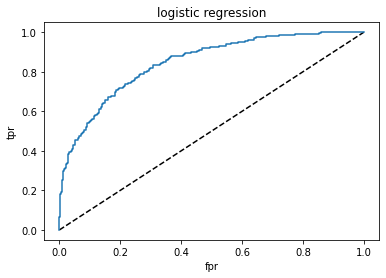

In [281]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='logistic regression')
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.title("logistic regression")
plt.show()

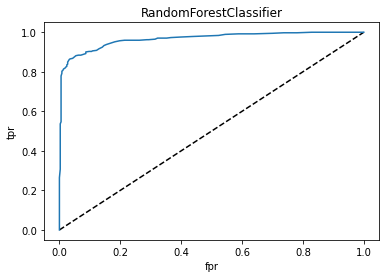

In [282]:

y_pred_prob=rf.predict_proba(x_test)[:,1]
fpr,tpr,threshold=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='RandomForestClassifier')
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.title("RandomForestClassifier")
plt.show()


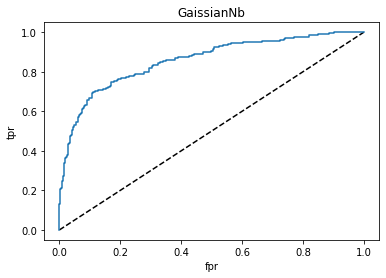

In [283]:
y_pred_prob=gnb.predict_proba(x_test)[:,1]
fpr,tpr,threshold=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='GaissianNb')
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.title("GaissianNb")
plt.show()


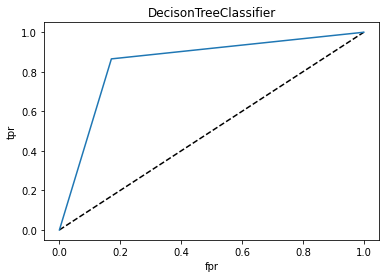

In [284]:
y_pred_prob=dtc.predict_proba(x_test)[:,1]
fpr,tpr,threshold=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='DecisonTreeClassifier')
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.title("DecisonTreeClassifier")
plt.show()


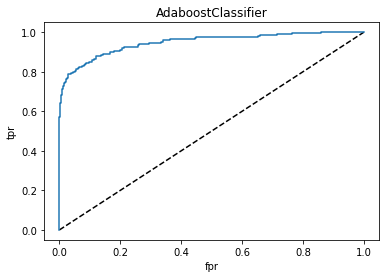

In [285]:
y_pred_prob=ad.predict_proba(x_test)[:,1]
fpr,tpr,threshold=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='AdaBoostClassifier')
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.title("AdaboostClassifier")
plt.show()


above roc curves show area under curves of different algorithms

In [314]:
scores=cross_val_score(lg,x2,y2,cv=5)
print("scores of Logisticregression",scores)
print(scores.mean())

scores of Logisticregression [0.60931174 0.79918864 0.78296146 0.72008114 0.59229209]
0.7007670134925392


In [315]:
scores=cross_val_score(dtc,x2,y2,cv=5)
print("scores of DecisionTreeClassifire",scores)
print(scores.mean())

scores of DecisionTreeClassifire [0.3562753  0.90872211 0.69979716 0.64300203 0.50709939]
0.6229791986597795


In [316]:
scores=cross_val_score(gnb,x2,y2,cv=5)
print("scores of GaissianNb",scores)
print(scores.mean())

scores of GaissianNb [0.65384615 0.80324544 0.76064909 0.79918864 0.7484787 ]
0.7530816039943828


In [317]:
scores=cross_val_score(sv,x2,y2,cv=5)
print("scores of SVR",scores)
print(scores.mean())

scores of SVR [0.24493927 0.48478702 0.53144016 0.44624746 0.29208925]
0.3999006331556775


In [318]:
scores=cross_val_score(rf,x2,y2,cv=5)
print("scores of RandomForestClassifire",scores)
print(scores.mean())

scores of RandomForestClassifire [0.69230769 0.97160243 0.95943205 0.96551724 0.55983773]
0.82973942892807


In [319]:
scores=cross_val_score(ad,x2,y2,cv=5)
print("score of Adaboostclassifire",scores)
print(scores.mean())

score of Adaboostclassifire [0.23076923 0.831643   0.74442191 0.82150101 0.48884381]
0.6234357934155095


checking cross val scores..By observing cross scores, random forestclassifier gives high accuracy,

# HyprrParameterTunning

In [1]:
from sklearn.model_selection import GridSearchCV

In [323]:
param_grid = { 
            "n_estimators"      : [10,20,30],
            "max_features"      : ["auto", "sqrt", "log2"],
            "min_samples_split" : [2,4,8],
            "bootstrap": [True, False],
            }

grid = GridSearchCV(estimator=rf, param_grid=param_grid, n_jobs=-1, cv=5)

grid.fit(x_train,y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [2, 4, 8],
                         'n_estimators': [10, 20, 30]})

In [324]:
grid.best_score_ 


0.9275814693809166

In [325]:
grid.best_params_

{'bootstrap': False,
 'max_features': 'log2',
 'min_samples_split': 2,
 'n_estimators': 30}

In [329]:
rf1=RandomForestClassifier(bootstrap=False,max_features= 'log2',min_samples_split=2,n_estimators=30)
rf1.fit(x_train,y_train)
rpred=rf.predict(x_test)
cv3=cross_val_score(rf1,x2,y2,cv=5)
print("score",cv3)
print(cv3.mean())

print("accuracy_score=",accuracy_score(y_test,rpred))
print("Classification report=",classification_report(y_test,rpred))
print("confusion matrix",confusion_matrix(y_test,rpred))

score [0.67004049 0.96754564 0.94929006 0.97363083 0.68559838]
0.8492210789104139
accuracy_score= 0.9148648648648648
Classification report=               precision    recall  f1-score   support

           0       0.88      0.97      0.92       369
           1       0.96      0.86      0.91       371

    accuracy                           0.91       740
   macro avg       0.92      0.92      0.91       740
weighted avg       0.92      0.91      0.91       740

confusion matrix [[357  12]
 [ 51 320]]


Creating object file of model

In [308]:
import joblib

In [330]:
joblib.dump(rf1,'HR-Employee-Analysis.obj')

['HR-Employee-Analysis.obj']

In [333]:
f1=joblib.load("HR-Employee-Analysis.obj")

In [334]:
f1.predict(x)

array([1, 0, 1, ..., 0, 0, 0])